**1. Imports of necessary libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import reuters

**2. Importing reuters data that comes with Tensorflow.Keras**

In [3]:
(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
print("Length of train dataset : {0}, test dataset: {1}".format(len(train_data), len(test_data)))

Length of train dataset : 8982, test dataset: 2246


In [5]:
print("Type of train_data & test_data: {0}".format(type(train_data)))

Type of train_data & test_data: <class 'numpy.ndarray'>


In [6]:
print("Train data of 6th index contains: {0} \n and corresponding label: {1}".format(train_data[6], train_label[6]))

Train data of 6th index contains: [1, 56, 5539, 925, 149, 8, 16, 23, 931, 3875, 25, 116, 5, 165, 15, 10, 67, 13, 12, 12, 11, 5311, 400, 81, 79, 457, 145, 22, 331, 28, 3026, 331, 61, 3609, 2097, 5311, 79, 64, 85, 1863, 84, 22, 44, 6206, 2275, 79, 296, 1384, 157, 5539, 8, 16, 23, 3875, 4, 116, 6, 837, 5311, 6, 3834, 31, 248, 1032, 8757, 4, 1618, 5, 37, 38, 1639, 27, 358, 37, 38, 4716, 9, 6, 9474, 4, 316, 9, 662, 5, 4, 765, 5, 291, 58, 60, 2660, 1067, 136, 4, 384, 292, 270, 120, 17, 12] 
 and corresponding label: 4


In [7]:
print("Test data of 20th index contains: {0} \n and corresponding label: {1}".format(test_data[20], test_label[20]))

Test data of 20th index contains: [1, 4, 204, 60, 40, 582, 61, 1588, 35, 15, 687, 5, 1170, 5, 1280, 3529, 1919, 4, 347, 5, 4532, 833, 345, 550, 52, 29, 6, 1038, 440, 35, 10, 60, 176, 118, 371, 4, 73, 3529, 31, 4474, 5, 155, 177, 68, 29, 9, 78, 206, 1956, 128, 140, 1637, 22, 12, 72, 6, 44, 102, 20, 4, 833, 55, 1429, 6, 444, 2027, 4, 159, 5, 4, 574, 9181, 239, 373, 50, 40, 2280, 1401, 31, 1553, 127, 108, 282, 4, 176, 8, 4, 282, 625, 10, 146, 274, 5, 95, 97, 533, 35, 37, 38, 15, 1223, 17, 12] 
 and corresponding label: 8


**3. Mapping dataset numbers to keywords**

In [8]:
word_index = reuters.get_word_index()
reverse_index = dict((value, key) for (key, value) in word_index.items())

565248/550378 [==============================] - 0s 0us/step


In [9]:
" ".join([reverse_index.get(i-3, ' ') for i in train_data[0]])

'      said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

***4. Preprocessing dataset - Original dataset contains numbers which are equivalent to corresponding words. This dataset needs to be one-hot encoded, i.e. it needs to represented as 0s and 1s.***

In [10]:
x_train = np.zeros((len(train_data), 10000))
for i, sequence in enumerate(train_data):
  x_train[i, sequence] = 1


x_test = np.zeros((len(test_data), 10000))
for j, seq in enumerate(test_data):
  x_test[j, seq] = 1

In [11]:
print("Original training data of index 100: ", train_data[100])
print("Vectorized training data of index 100: ", x_train[100])

Original training data of index 100:  [1, 367, 1394, 169, 65, 87, 209, 30, 306, 228, 10, 803, 305, 96, 5, 196, 15, 10, 523, 2, 3006, 293, 484, 2, 1440, 5825, 8, 145, 7, 10, 1670, 6, 10, 294, 517, 237, 2, 367, 8042, 7, 2477, 1177, 483, 1440, 5825, 8, 367, 1394, 4, 169, 387, 66, 209, 30, 2344, 652, 1496, 9, 209, 30, 2564, 228, 10, 803, 305, 96, 5, 196, 15, 51, 36, 1457, 24, 1345, 5, 4, 196, 150, 10, 523, 320, 64, 992, 6373, 13, 367, 190, 297, 64, 85, 1692, 6, 8656, 122, 9, 36, 1457, 24, 269, 4753, 27, 367, 212, 114, 45, 30, 3292, 7, 126, 2203, 13, 367, 6, 1818, 4, 169, 65, 96, 28, 432, 23, 189, 1254, 4, 9725, 320, 5, 196, 15, 10, 523, 25, 730, 190, 57, 64, 6, 9953, 2016, 6373, 7, 2, 122, 1440, 5825, 8, 269, 4753, 1217, 7, 608, 2203, 30, 3292, 1440, 5825, 8, 43, 339, 43, 231, 9, 667, 1820, 126, 212, 4197, 21, 1709, 249, 311, 13, 260, 489, 9, 65, 4753, 64, 1209, 4397, 249, 954, 36, 152, 1440, 5825, 506, 24, 135, 367, 311, 34, 420, 4, 8407, 200, 1519, 13, 137, 730, 190, 7, 104, 570, 52, 64,

In [12]:
one_hot_encoded_train_label = tf.keras.utils.to_categorical(train_label)
one_hot_encoded_test_label = tf.keras.utils.to_categorical(test_label)

***5. Training phase -- a network of 3 layers that starts with Dense layer of 64 unit, followed by another same layer and ends with a Dense layer of 46 units, as there are 46 categories of data. First 2 layers use 'relu' activation and the last one uses 'softmax' activation.***

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(10000,), activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

In [14]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
x_val = x_train[:1000]
remaining_x_train = x_train[1000:]

y_val = one_hot_encoded_train_label[:1000]
remaining_y_train = one_hot_encoded_train_label[1000:]

In [19]:
result = model.fit(
    remaining_x_train,
    remaining_y_train,
    epochs = 20,
    batch_size = 512,
    validation_data = (x_val, y_val)
)

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 2.4895 - accuracy: 0.5441 - val_loss: 1.6378 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 1s 49ms/step - loss: 1.3567 - accuracy: 0.7167 - val_loss: 1.2705 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.0143 - accuracy: 0.7815 - val_loss: 1.1109 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8007 - accuracy: 0.8281 - val_loss: 1.0018 - val_accuracy: 0.7900
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.6411 - accuracy: 0.8624 - val_loss: 0.9349 - val_accuracy: 0.8030
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5095 - accuracy: 0.8918 - val_loss: 0.9367 - val_accuracy: 0.7970
Epoch 7/20
16/16 [==============================] - 1s 49ms/step - loss: 0.4148 - accuracy: 0.9109 - val_loss: 0.9075 - val_accuracy: 0.8040
Epoch 8/20
16

In [21]:
result_dictionary = result.history
print(result_dictionary.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


***Following result shows that the model is overfitted.***

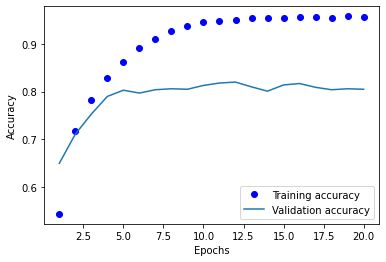

In [24]:
accuracy = result_dictionary['accuracy']
val_accuracy = result_dictionary['val_accuracy']

epok = range(1, len(result_dictionary.get('accuracy'))+1)

plt.plot(epok, accuracy,'bo', label='Training accuracy')
plt.plot(epok, val_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

***A little tuning.***

Epoch 1/20
32/32 [==============================] - 2s 34ms/step - loss: 2.3852 - accuracy: 0.4959 - val_loss: 1.5545 - val_accuracy: 0.6230
Epoch 2/20
32/32 [==============================] - 1s 29ms/step - loss: 1.4747 - accuracy: 0.6560 - val_loss: 1.3094 - val_accuracy: 0.7020
Epoch 3/20
32/32 [==============================] - 1s 29ms/step - loss: 1.2255 - accuracy: 0.7149 - val_loss: 1.1686 - val_accuracy: 0.7350
Epoch 4/20
32/32 [==============================] - 1s 30ms/step - loss: 1.0402 - accuracy: 0.7528 - val_loss: 1.0823 - val_accuracy: 0.7590
Epoch 5/20
32/32 [==============================] - 1s 29ms/step - loss: 0.9123 - accuracy: 0.7873 - val_loss: 1.0297 - val_accuracy: 0.7810
Epoch 6/20
32/32 [==============================] - 1s 28ms/step - loss: 0.7980 - accuracy: 0.8104 - val_loss: 0.9793 - val_accuracy: 0.7960
Epoch 7/20
32/32 [==============================] - 1s 29ms/step - loss: 0.7225 - accuracy: 0.8307 - val_loss: 0.9654 - val_accuracy: 0.8030
Epoch 8/20
32

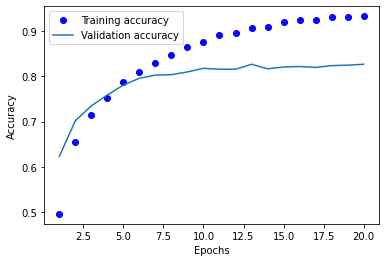

In [30]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape=(10000,), activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


result = model.fit(
    remaining_x_train,
    remaining_y_train,
    epochs = 20,
    batch_size = 256,
    validation_data = (x_val, y_val)
)

result_dictionary = result.history


accuracy = result_dictionary['accuracy']
val_accuracy = result_dictionary['val_accuracy']

epok = range(1, len(result_dictionary.get('accuracy'))+1)

plt.plot(epok, accuracy,'bo', label='Training accuracy')
plt.plot(epok, val_accuracy, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

***Following shows prediction of a data point.***

In [38]:
print("Original 6th data of test dataset:")
print(" ".join([reverse_index.get(i-3, ' ') for i in test_data[10]]))

print("Original label: ", test_label[6])

Original 6th data of test dataset:
  grain traders said they were still awaiting results of yesterday's u k intervention feed wheat tender for the home market the market sought to buy 340 000 tonnes more than double the remaining 150 000 tonnes available under the current tender however some of the tonnage included   bids for supplies in the same stores since the tenders started last july   000 tonnes of british feed wheat have been sold back to the home market reuter 3
Original label:  3


In [39]:
print("Predicted 6th label:")
prediction = model.predict(x_test[6:7])
print(np.argmax(prediction))

Predicted 6th label:
3
